# Тестовое задание для Стажера-аналитика данных

Выполнил: Смерчанский Павел

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv('Гидроторакс.csv')
df2 = pd.read_csv('Снижение пневматизации.csv')
df3 = pd.read_csv('Очаг.csv')

## №1
1) Оценить качество разметки каждого врача по каждой патологии

**Подсказка**: качество можно сравнивать как среднее отклонение от усредненной по всем врачам разметке или как среднюю ковариацию со всеми другими врачами, можно придумать и другие способы

2) Построить графики хорошо отображающие информацию по качеству разметки каждого врача

Определим качество как *долю совпадений разметок каждого врача с мнением большинства*

In [3]:
#Реализуем функцию, возвращающую качество каждого врача в виде списка
'''На вход подаётся dataframe с исходными данными
   На выходе 3 значения: qulity - список с качеством разметки каждого врача, df['Предположение'] - Series с итоговой разметкой
   round(all_part * 100) - уверенность в выбраном диагнозе. То есть доля врачей, согласных именно с наличием (1)'''
def get_q(df):
    df = df.drop('ID Файла', axis=1)
    
    # Количество снимков
    images_num = len(df)

    #Количество врачей
    doctor_num = len(df.T)
    
    #транспонируем DataFrame для рассчёта доли установленных патологий по каждому снимку
    all_part = df.T.mean()
    
    #находим предположительные диагноза на основе голосования большинства. Для его имитации используем функцию round()
    df['Предположение'] = round(all_part)
    
    #Теперь оценим качество для каждого врача. Качество определим как долю совпадений с мнением большинства в колонке "Предположение
    quality = []
    for j in range(doctor_num):
        df['compare'+str(j+1)] = df['Врач№'+str(j+1)] == df['Предположение']
        quality.append(round(df['compare'+str(j+1)].sum() / images_num * 100, 2))

    return quality, df['Предположение'], round(all_part * 100)

Качество врачей по каждой патологии

In [4]:
#Формуируем список врачей с помощью генератора списка
doc = ["Врач№"+str(i+1) for i in range(15)]

#Получаем качества врачей по каждой патологии
A = get_q(df1)[0]
B = get_q(df2)[0]
C = get_q(df3)[0]

print('Гидраторакс:', *list(zip(doc, A)), sep = '\n')
print()
print('Очаг:', *list(zip(doc, B)), sep = '\n')
print()
print('Снижение пневматизации:', *list(zip(doc, C)), sep = '\n')

Гидраторакс:
('Врач№1', 93.5)
('Врач№2', 87.84)
('Врач№3', 90.15)
('Врач№4', 94.13)
('Врач№5', 87.42)
('Врач№6', 80.71)
('Врач№7', 92.24)
('Врач№8', 88.89)
('Врач№9', 90.99)
('Врач№10', 93.08)
('Врач№11', 92.66)
('Врач№12', 95.39)
('Врач№13', 94.34)
('Врач№14', 94.97)
('Врач№15', 93.29)

Очаг:
('Врач№1', 91.82)
('Врач№2', 91.61)
('Врач№3', 89.94)
('Врач№4', 89.73)
('Врач№5', 90.15)
('Врач№6', 84.49)
('Врач№7', 88.89)
('Врач№8', 82.81)
('Врач№9', 90.78)
('Врач№10', 88.89)
('Врач№11', 84.91)
('Врач№12', 81.55)
('Врач№13', 86.37)
('Врач№14', 89.31)
('Врач№15', 90.57)

Снижение пневматизации:
('Врач№1', 94.34)
('Врач№2', 80.71)
('Врач№3', 95.6)
('Врач№4', 88.89)
('Врач№5', 94.97)
('Врач№6', 87.0)
('Врач№7', 88.47)
('Врач№8', 88.26)
('Врач№9', 94.34)
('Врач№10', 92.66)
('Врач№11', 92.87)
('Врач№12', 89.31)
('Врач№13', 94.76)
('Врач№14', 93.29)
('Врач№15', 76.1)


In [5]:
#Функция сортировки врачей по качеству
'''На вход подаются два параметра: doctors - список врачей, quality - список с качеством каждого врача
   На выходе получаем список из 2 кортежей, отсортированные по качеству'''
def sort_doctors(doctors, quality):
    w = list(zip(*sorted(zip(doctors, quality), key=lambda tpl: tpl[1])))
    return w

In [6]:
#Выведем информацию о качестве каждого врача в отсортированном по возрастанию качества виде
A_sort = sort_doctors(doc, A)
B_sort = sort_doctors(doc, B)
C_sort = sort_doctors(doc, C)

print(*A_sort)
print()
print(*B_sort)
print()
print(*C_sort)

('Врач№6', 'Врач№5', 'Врач№2', 'Врач№8', 'Врач№3', 'Врач№9', 'Врач№7', 'Врач№11', 'Врач№10', 'Врач№15', 'Врач№1', 'Врач№4', 'Врач№13', 'Врач№14', 'Врач№12') (80.71, 87.42, 87.84, 88.89, 90.15, 90.99, 92.24, 92.66, 93.08, 93.29, 93.5, 94.13, 94.34, 94.97, 95.39)

('Врач№12', 'Врач№8', 'Врач№6', 'Врач№11', 'Врач№13', 'Врач№7', 'Врач№10', 'Врач№14', 'Врач№4', 'Врач№3', 'Врач№5', 'Врач№15', 'Врач№9', 'Врач№2', 'Врач№1') (81.55, 82.81, 84.49, 84.91, 86.37, 88.89, 88.89, 89.31, 89.73, 89.94, 90.15, 90.57, 90.78, 91.61, 91.82)

('Врач№15', 'Врач№2', 'Врач№6', 'Врач№8', 'Врач№7', 'Врач№4', 'Врач№12', 'Врач№10', 'Врач№11', 'Врач№14', 'Врач№1', 'Врач№9', 'Врач№13', 'Врач№5', 'Врач№3') (76.1, 80.71, 87.0, 88.26, 88.47, 88.89, 89.31, 92.66, 92.87, 93.29, 94.34, 94.34, 94.76, 94.97, 95.6)


In [7]:
#Реализуем функцию, визуализирующую общую статистику врачей
def get_graph(doctors, quality, title_text):
    x = doctors
    y = quality

    mean_quality = np.mean(quality)       #sum(quality) / len(quality)
    std_quality = np.std(quality)
    
    fig, ax = plt.subplots()

    ax.bar(x, y)

    ax.set_xlabel('Врачи', fontsize=12)
    ax.set_ylabel('Качество', fontsize=12)
    ax.set_title(str(title_text), fontsize=12)
    plt.rc('xtick', labelsize= 10)
    plt.rc('ytick', labelsize= 10)

    plt.axis([-1,15, mean_quality - 3 * std_quality, mean_quality + 3 * std_quality])
    plt.axhline (y=mean_quality, color='red', linestyle='--', label = 'Среднее значение')
    plt.axhline (y=mean_quality + std_quality, color='blue', linestyle='--', label = 'MAX') 
    plt.axhline (y=mean_quality - std_quality, color='black', linestyle='--', label = 'MIN') 
    plt.legend()
    
    fig.set_figwidth(10)    # ширина Figure
    fig.set_figheight(6)    # высота Figure
    plt.xticks(rotation=90)
    plt.grid(True)          # линии сетки
    plt.show()

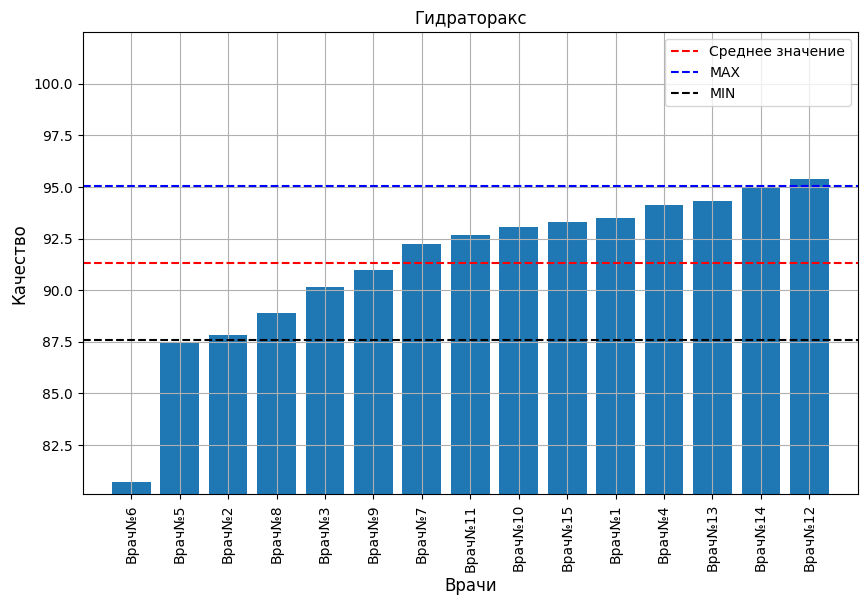

In [8]:
get_graph(A_sort[0], A_sort[1], 'Гидраторакс')

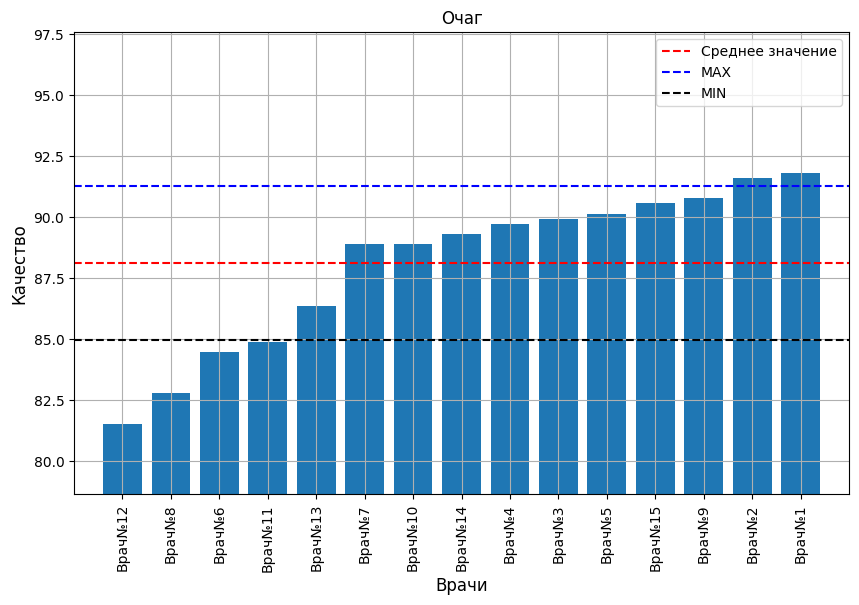

In [9]:
get_graph(B_sort[0], B_sort[1], 'Очаг')

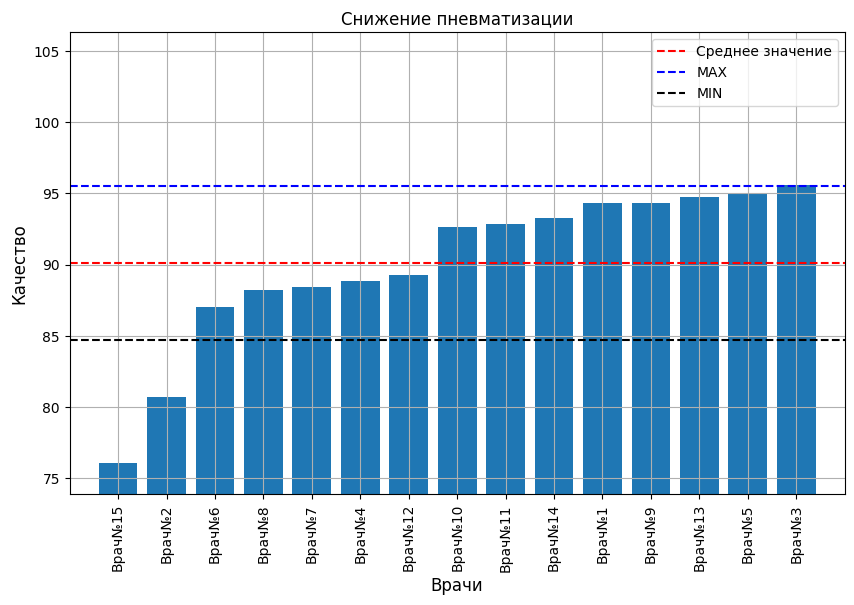

In [10]:
get_graph(C_sort[0], C_sort[1], 'Снижение пневматизации')

## №2 
Отберите худших врачей по каждой из патологий. 

**Комментарий**: Необходимо описать принцип отбора

Отбор худших врачей произведём следующим образом:
1) Определим среднее значение качества по каждой патологии $mean\_quality$;
2) Определяем стандартное отклонение качества $std\_quality$;
2) Если врач обладает качеством не лежащем в интервале [$mean\_quality - std\_quality; mean\_quality + std\_quality$], то считаем его одним худших.

In [11]:
#Функция, отбирающая худших врачей. Она сравнивает качество каждого врача с минимально допустимым значением
'''На вход подаётся один параметр. sort_list_qual_doc - список, состоящий из 2 кортежей, которые соответствуют именам врачей их качеству '''
def get_bad_doctors(sort_list_qual_doc):
    res = []
    for j in range(len(sort_list_qual_doc[0])):
        if sort_list_qual_doc[1][j] < np.mean(sort_list_qual_doc[1]) - np.std(sort_list_qual_doc[1]):
            res.append(sort_list_qual_doc[0][j])
            
    return res

In [12]:
print('Гидраторакс:', get_bad_doctors(A_sort))
print('Очаг:', get_bad_doctors(B_sort))
print('Снижение пневматизации:', get_bad_doctors(C_sort))

Гидраторакс: ['Врач№6', 'Врач№5']
Очаг: ['Врач№12', 'Врач№8', 'Врач№6', 'Врач№11']
Снижение пневматизации: ['Врач№15', 'Врач№2']


Графики выше также наглядно демонстрируют врачей, чьё качество не попало в интервал пункта 3. По каждой патологии получаем **худших** врачей:

1) **Гидраторакс**: Врач№6, Врач№5
2) **Очаг**: Врач№12, Врач№8, Врач№6, Врач№11
3) **Снижение пневматизации**: Врач№15, Врач№12

## №3
Сформируйте итоговую разметку (для каждого снимка только одно значение 0 или 1). А также уверенность в разметке каждого снимка.

**Комментарий**: критерий уверенности в разметке предлагается выбрать самим

В качестве уверенности примем долю соглашений с наличием патологии (1) большинства врачей.

Например: значение в итоговой разметке 0, то процент уверенности означет уверенность в противоположном диагнозе.

In [13]:
res_df = pd.DataFrame({'Гидраторакс': get_q(df1)[1], 'Уверенность (Гидраторакс), %': get_q(df1)[2], 'Очаг': get_q(df2)[1], 'Уверенность (Очаг), %': get_q(df2)[2], 'Снижение пневматизации': get_q(df3)[1], 'Уверенность (Снижение пневматизации), %': get_q(df3)[2]})

In [14]:
res_df

,Гидраторакс,"Уверенность (Гидраторакс), %",Очаг,"Уверенность (Очаг), %",Снижение пневматизации,"Уверенность (Снижение пневматизации), %"
0,1.0,73.0,0.0,27.0,0.0,13.0
1,0.0,13.0,0.0,7.0,0.0,0.0
2,0.0,33.0,0.0,7.0,0.0,7.0
3,0.0,40.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,20.0,0.0,20.0
...,...,...,...,...,...,...
472,0.0,7.0,0.0,13.0,0.0,0.0
473,1.0,53.0,0.0,20.0,0.0,27.0
474,0.0,40.0,0.0,0.0,0.0,0.0
475,1.0,80.0,0.0,0.0,0.0,0.0


## №4

Оцените итоговое качество разметки по каждой из патологий. 

**Комментарий**: необходимо получить численную оценку, а также можно привести комментарии с доводами о качестве разметки

Итоговое качество будем считать как среднее арифметическое значение качества по каждой из патологии. Также найдём относительную погрешность при определении качества

In [15]:
res_quality1 = np.mean(A)
res_quality2 = np.mean(B)
res_quality3 = np.mean(C)

res_std1 = np.std(A)
res_std2 = np.std(B)
res_std3 = np.std(C)

error1 = res_std1 / res_quality1 * 100
error2 = res_std2 / res_quality2 * 100
error3 = res_std3 / res_quality3 * 100

In [16]:
print(f'Гидраторакс: итоговое качество: {round(res_quality1, 2)}%, относительная погрешность: {round(error1, 2)}%')
print(f'Очаг: итоговое качество: {round(res_quality2, 2)}%, относительная погрешность: {round(error2, 2)}%')
print(f'Снижение пневматизации: итоговое качество: {round(res_quality3, 2)}%, относительная погрешность: {round(error3, 2)}%')

Гидраторакс: итоговое качество: 91.31%, относительная погрешность: 4.08%
Очаг: итоговое качество: 88.12%, относительная погрешность: 3.58%
Снижение пневматизации: итоговое качество: 90.1%, относительная погрешность: 6.0%
